In [1]:
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis,skew
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%run ../funtion/Funciones.ipynb

# Exercicio 3
# Repita o exercício anterior considerando, entretanto, o algoritmo pmodel.py

### Endogenous (setup: N, p: 0.32-0.42, beta=0.4)
### Exogenous (setup: N, p: 0.18-0.28, beta=0.7)

# O termo exógeno é usado para se referir a algo que se origina do lado de fora de uma coisa, em oposição a endógeno.

# Grupos Endogenos

### 3 familias endogenos com p 0.32, 0.37 e 0.42 e betha 0.4 e 10 series cada

In [2]:
endogeno1 = np.zeros([8192,10])
endogeno2 = np.zeros([8192,10])
endogeno3 = np.zeros([8192,10])

for t in range(10):
    
    y1,y2,y3 = 0,0,0
    x1,y1 = pmodel (8192, 0.35, 0.4)
    x2,y2 = pmodel (8192, 0.38, 0.4)
    x3,y3 = pmodel (8192, 0.42, 0.4)
    
    endogeno1[:,t] = y1[:]
    endogeno2[:,t] = y2[:]
    endogeno3[:,t] = y3[:]

# Grupos Exogenos
### 3 familias exogenos com p 0.18, 0.23, 0.28 e betha 0.7 e 10 series cada

In [3]:
exogeno1 = np.zeros([8192,10])
exogeno2 = np.zeros([8192,10])
exogeno3 = np.zeros([8192,10])

for t in range(10):
    
    y1,y2,y3 = 0,0,0
    x1,y1 = pmodel (8192, 0.18, 0.7)
    x2,y2 = pmodel (8192, 0.23, 0.7)
    x3,y3 = pmodel (8192, 0.28, 0.7)
    
    exogeno1[:,t] = y1[:]
    exogeno2[:,t] = y2[:]
    exogeno3[:,t] = y3[:]

Text(0.5, 1.0, 'Exogeno p = 0.28 e betha = 0.7')

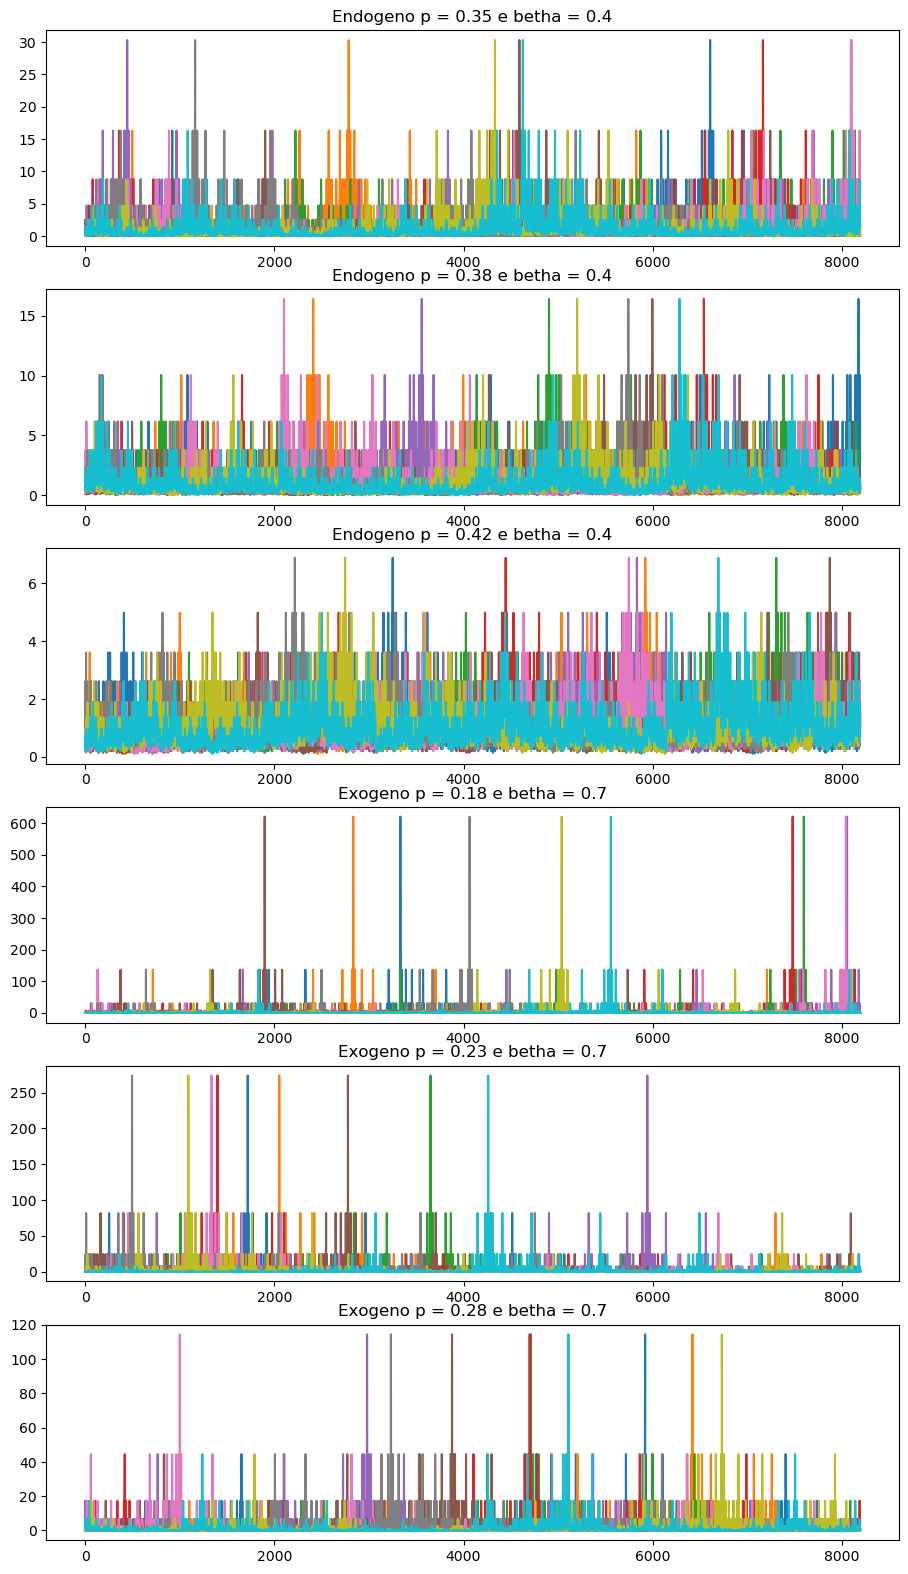

In [4]:
fig1 = plt.figure(figsize=(11,20),dpi=100)

plt.subplot(6, 1, 1)
plt.plot(endogeno1)
plt.title('Endogeno p = 0.35 e betha = 0.4')

plt.subplot(6, 1, 2)
plt.plot(endogeno2)
plt.title('Endogeno p = 0.38 e betha = 0.4')

plt.subplot(6, 1, 3)
plt.plot(endogeno3)
plt.title('Endogeno p = 0.42 e betha = 0.4')

plt.subplot(6, 1, 4)
plt.plot(exogeno1)
plt.title('Exogeno p = 0.18 e betha = 0.7')

plt.subplot(6, 1, 5)
plt.plot(exogeno2)
plt.title('Exogeno p = 0.23 e betha = 0.7')

plt.subplot(6, 1, 6)
plt.plot(exogeno3)
plt.title('Exogeno p = 0.28 e betha = 0.7')

# Series Normalizadas

In [5]:
endogeno1_norm,endogeno1_esta = Normalizar1(endogeno1)
endogeno2_norm,endogeno2_esta = Normalizar1(endogeno2)
endogeno3_norm,endogeno3_esta = Normalizar1(endogeno3)

In [6]:
exogeno1_norm,exogeno1_esta = Normalizar1(exogeno1)
exogeno2_norm,exogeno2_esta = Normalizar1(exogeno2)
exogeno3_norm,exogeno3_esta = Normalizar1(exogeno3)

In [7]:
endogeno1_esta = endogeno1_esta.drop(['Group','Cor'],axis=1)
endogeno1_esta['Group'] = 'Endogeno'

endogeno2_esta = endogeno2_esta.drop(['Group','Cor'],axis=1)
endogeno2_esta['Group'] = 'Endogeno'

endogeno3_esta = endogeno3_esta.drop(['Group','Cor'],axis=1)
endogeno3_esta['Group'] = 'Endogeno'

In [8]:
exogeno1_esta = exogeno1_esta.drop(['Group','Cor'],axis=1)
exogeno1_esta['Group'] = 'Exogeno'

exogeno2_esta = exogeno2_esta.drop(['Group','Cor'],axis=1)
exogeno2_esta['Group'] = 'Exogeno'

exogeno3_esta = exogeno3_esta.drop(['Group','Cor'],axis=1)
exogeno3_esta['Group'] = 'Exogeno'

Text(0.5, 1.0, 'Exogeno Normalizado p = 0.28 e betha = 0.7')

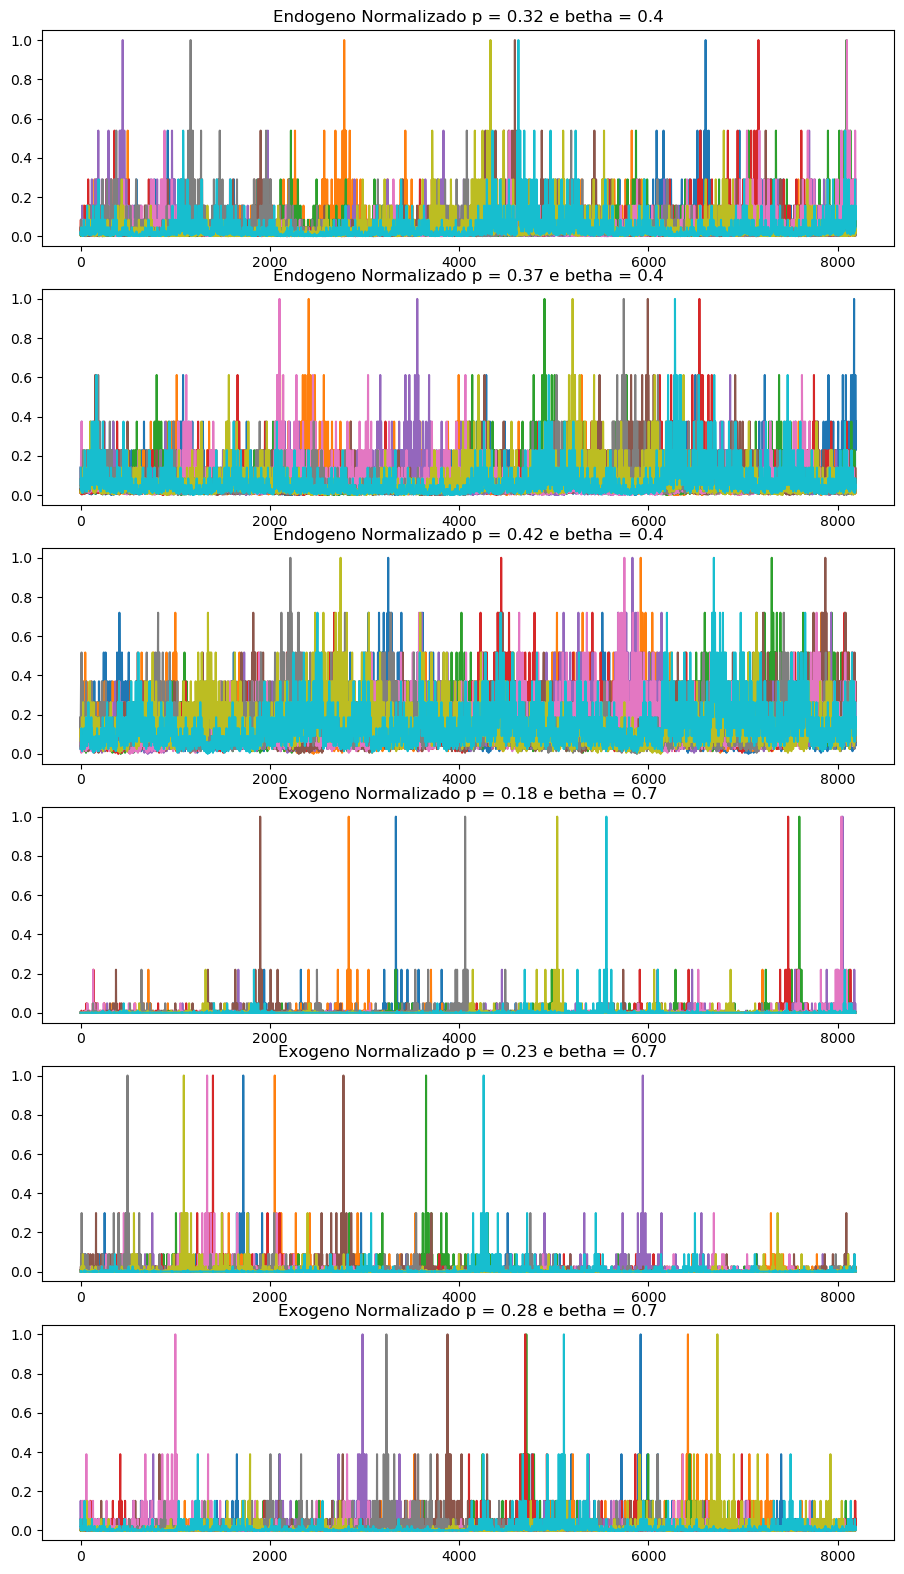

In [9]:
fig2 = plt.figure(figsize=(11,20),dpi=100)

plt.subplot(6, 1, 1)
plt.plot(endogeno1_norm)
plt.title('Endogeno Normalizado p = 0.32 e betha = 0.4')

plt.subplot(6, 1, 2)
plt.plot(endogeno2_norm)
plt.title('Endogeno Normalizado p = 0.37 e betha = 0.4')

plt.subplot(6, 1, 3)
plt.plot(endogeno3_norm)
plt.title('Endogeno Normalizado p = 0.42 e betha = 0.4')

plt.subplot(6, 1, 4)
plt.plot(exogeno1_norm)
plt.title('Exogeno Normalizado p = 0.18 e betha = 0.7')

plt.subplot(6, 1, 5)
plt.plot(exogeno2_norm)
plt.title('Exogeno Normalizado p = 0.23 e betha = 0.7')

plt.subplot(6, 1, 6)
plt.plot(exogeno3_norm)
plt.title('Exogeno Normalizado p = 0.28 e betha = 0.7')

# Diagrama de dispersão

## Plotando as series normalizadas

In [10]:
frames = [endogeno1_esta,endogeno2_esta,endogeno3_esta,exogeno1_esta,exogeno2_esta,exogeno3_esta]
result = pd.concat(frames,ignore_index=True)

<Figure size 1000x1000 with 0 Axes>

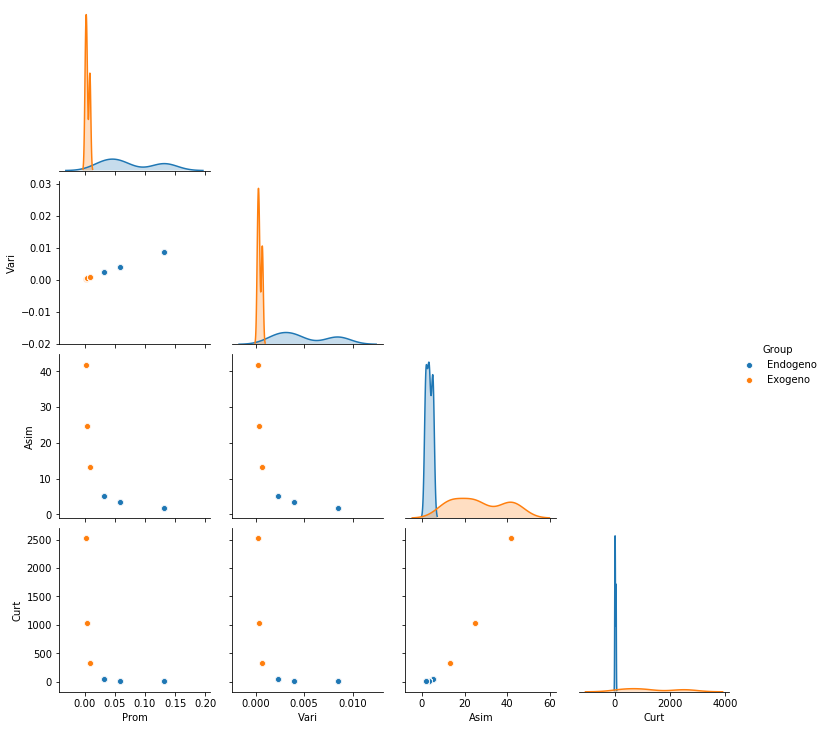

In [11]:
fig3 = plt.figure(figsize=(10,10),dpi=100)
sns.pairplot(result,hue="Group",corner=True)

### Os valores de distribuição da média e dispersão são praticamente centrados para o caso do Exogeno e para a assimetria e kurtuosis a distribuição se encontra muito dispersa, este comportamento e opuesto para o grupo Endogeno.

# K-means

In [12]:
X = np.array(result[["Vari","Asim","Curt"]])
y = np.array(result['Group'])
X.shape

(60, 3)

In [23]:
Nc = range(1,8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

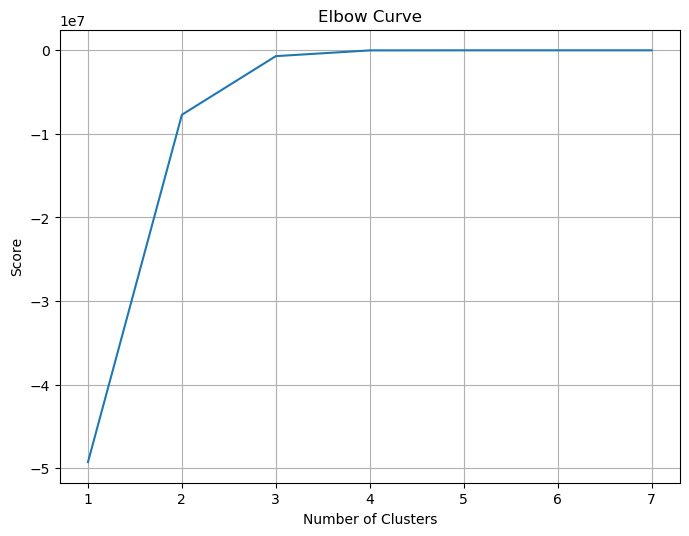

In [24]:
fig3 = plt.figure(figsize=(8,6),dpi=100)
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

In [25]:
X = np.array(result.drop(['Group'],axis=1))

In [26]:
kmeans = KMeans(n_clusters=2,random_state=0)

In [27]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [28]:
result['K-classes'] = kmeans.labels_

### O diagrama acima mostra que dois grupos podem ser considerados como um número adequado de grupos.

# Resultados

<Figure size 1000x1000 with 0 Axes>

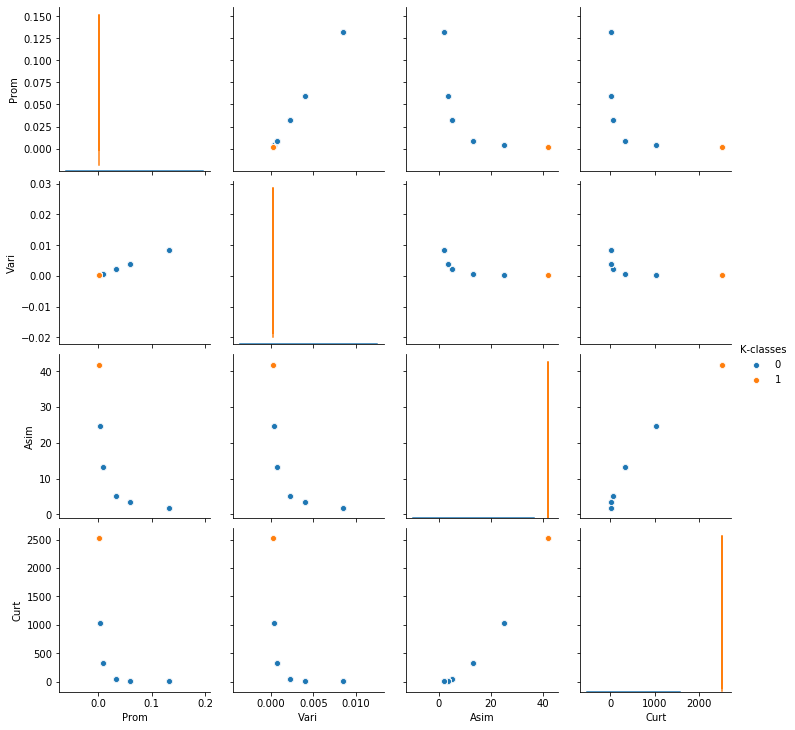

In [29]:
fig2 = plt.figure(figsize=(10,10),dpi=100)
sns.pairplot(result.drop(['Group'],axis=1),'K-classes')

In [30]:
k0 = result[result['K-classes'] == 0]
k1 = result[result['K-classes'] == 1]

In [31]:
k0

,Prom,Vari,Asim,Curt,Group,K-classes
0,0.032707,0.002253,5.106283,48.390242,Endogeno,0
1,0.032707,0.002253,5.106283,48.390242,Endogeno,0
2,0.032707,0.002253,5.106283,48.390242,Endogeno,0
3,0.032707,0.002253,5.106283,48.390242,Endogeno,0
4,0.032707,0.002253,5.106283,48.390242,Endogeno,0
5,0.032707,0.002253,5.106283,48.390242,Endogeno,0
6,0.032707,0.002253,5.106283,48.390242,Endogeno,0
7,0.032707,0.002253,5.106283,48.390242,Endogeno,0
8,0.032707,0.002253,5.106283,48.390242,Endogeno,0
9,0.032707,0.002253,5.106283,48.390242,Endogeno,0


In [32]:
k1

,Prom,Vari,Asim,Curt,Group,K-classes
30,0.001611,0.000222,41.854886,2520.769431,Exogeno,1
31,0.001611,0.000222,41.854886,2520.769431,Exogeno,1
32,0.001611,0.000222,41.854886,2520.769431,Exogeno,1
33,0.001611,0.000222,41.854886,2520.769431,Exogeno,1
34,0.001611,0.000222,41.854886,2520.769431,Exogeno,1
35,0.001611,0.000222,41.854886,2520.769431,Exogeno,1
36,0.001611,0.000222,41.854886,2520.769431,Exogeno,1
37,0.001611,0.000222,41.854886,2520.769431,Exogeno,1
38,0.001611,0.000222,41.854886,2520.769431,Exogeno,1
39,0.001611,0.000222,41.854886,2520.769431,Exogeno,1


### O K-means não apresentou resultados muito adequados, uma vez que foram adicionadas ao grupo endógeno várias séries do grupo exógeno (tabela acima), provavelmente devido ao diagrama de dispersão em que um grupo é praticamente a continuação do outro, dificultando a separação dos grupos, pelo menos com as métricas usadas.